<h1 style="color:rgb(0,120,170)">Assignment 8: CNNs </h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors

<h2 style="color:rgb(0,120,170)">Automatic Testing Guidelines</h2>

Automatic unittesting requires you, as a student, to submit a notebook which contains strictly defined objects.
Strictness of definition consists of unified shapes, dtypes, variable names and more.

Within the notebook, we provide detailed instruction which you should follow in order to maximise your final grade.

**Name your notebook properly**, follow the pattern in the template name:

**Assignment_N_NameSurname_matrnumber**
<ol>
    <li>N - number of assignment</li>
    <li>NameSurname - your full name where every part of the name starts with a capital letter, no spaces</li>
    <li>matrnumber - you student number on ID card (without k, potenitially with a leading zero)</li>
</ol>

Don't add any cells but use the ones provided by us. You may notice that most cells are tagged such that the unittest routine can recognise them.

We highly recommend you to develop your code within the provided cells. You can implement helper functions where needed unless you put them in the same cell they are actually called. Always make sure that implemented functions have the correct output and given variables contain the correct data type.

**Note:** Never use variables you defined in another cell in your functions directly; always pass them to the function as a parameter. In the unitest they won't be available either.

<h2 style="color:rgb(0,120,170)">Task 1: Explicit Computation of CNNs</h2>




<h2 style="color:rgb(0,120,170)">Task 1.1: Convolution and Stride</h2>

In this task, you should do some computuations for CNNs explicitly to gain further understanding how the corresponding operations work. Your are not allowed to use any other modules than numpy for all the problems in task 1.

Assume you are given the following input image, represented as $\mathbf{x}=\begin{pmatrix} 1 & 0 & 1 & 1 & 0 & 0 \\ 0 & 1 & 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 1 & 1 & 0 \\ 1 & 1 & 0 & 1 & 1 & 1 \\ 0 & 1 & 1 & 1 & 0 & 0 \\ 1 & 1 & 1 & 0 & 0 & 1  \end{pmatrix}$.
* Consider the filter $\mathbf{W}=\begin{pmatrix} 1 & 1 & 1 \\ 0 & 2 & 0 \\ 1 & 1 & 1 \end{pmatrix}$ and compute $\mathbf{s}=\mathbf{W} * \mathbf{x}$. To do this, implement the function `compute_convolution` which computes the output.
* Now add the functionality of using the stride parameter to the function and test it for $S=2$.

<h3 style="color:rgb(208,90,80)">1.1 Code (30 points)</h3>

In [1]:
import numpy as np
image = np.array([[1,0,1,1,0,0],[0,1,1,0,0,0],[0,1,0,1,1,0],[1,1,0,1,1,1],[0,1,1,1,0,0],[1,1,1,0,0,1]])
filter_ = np.array([[1,1,1],[0,2,0],[1,1,1]])

In [2]:
"""
Function that computes convolution of image array
@param image, np.array, image data
@param filter_, np.array, filter
@stride, integer, indictates the amount of striding

@output convolved, np.array, result of convolution
"""
def compute_convolution(image,filter_,stride):
    width=int((image.shape[0]-filter_.shape[0])/stride+1)
    height=int((image.shape[1]-filter_.shape[1])/stride+1)
    convolved=np.zeros((width,height))
    ci,cj=0,0
        
    for i in range(0,image.shape[0],stride):
        if i>image.shape[0]-filter_.shape[0]:
            break
        cj=0
        for j in range(0,image.shape[1],stride):
            if j>image.shape[1]-filter_.shape[1]:
                break
            img=image[i:i+filter_.shape[0],j:j+filter_.shape[1]]
            convolved[ci,cj]=np.sum(np.multiply(img,filter_))
            cj+=1
        ci+=1
    return convolved

In [3]:
print(compute_convolution(image,filter_,1))
print(compute_convolution(image,filter_,3))

[[5. 6. 4. 3.]
 [6. 4. 5. 5.]
 [5. 5. 6. 5.]
 [7. 6. 5. 4.]]
[[5. 3.]
 [7. 4.]]


<h2 style="color:rgb(0,120,170)">Task 1.2: Pooling</h2>

After convolution layers, you usually find pooling layers in CNNs to reduce the input size for further layers. To this end, we ask you to implement your own pooling function as well.

* Implement the function `max_pooling()` which applies max-pooling to an input image.
* Now also implement the function `mean_pooling()`, which instead of taking the maximum value in the window calculates the mean for each output entry.

**Hint:** You can reuse big parts of the previous task for this. 

<h3 style="color:rgb(208,90,80)">1.2 Code (15 points)</h3>

In [4]:
"""
Function that applies max pooling on image
@param image, np.array, image data
@pooling_size, integer, indicates the size of the pooling "kernel"

@output pooled, np.array, output of pooling operation
"""
def max_pooling(image,pooling_size):
    width=int((image.shape[0]-pooling_size)/1+1)
    height=int((image.shape[1]-pooling_size)/1+1)
    pooled=np.zeros((width,height))
    ci,cj=0,0
    
    for i in range(0,image.shape[0]):
        if i>image.shape[0]-pooling_size:
            break
        cj=0
        for j in range(0,image.shape[1]):
            if j>image.shape[1]-pooling_size:
                break
            img=image[i:i+pooling_size,j:j+pooling_size]
            pooled[i,j]=np.amax(img)
            cj+=1
        ci+=1
    return pooled

In [5]:
"""
Function that applies mean pooling on image
@param image, np.array, image data
@pooling_size, integer, indicates the size of the pooling "kernel"

@output pooled, np.array, output of pooling operation
"""
def mean_pooling(image,pooling_size):
    width=int((image.shape[0]-pooling_size)/1+1)
    height=int((image.shape[1]-pooling_size)/1+1)
    pooled=np.zeros((width,height))
    ci,cj=0,0
    
    for i in range(0,image.shape[0]):
        if i>image.shape[0]-pooling_size:
            break
        cj=0
        for j in range(0,image.shape[1]):
            if j>image.shape[1]-pooling_size:
                break
            img=image[i:i+pooling_size,j:j+pooling_size]
            pooled[ci,cj]=np.mean(img)
            cj+=1
        ci+=1
    return pooled

In [6]:
print(max_pooling(image,2))
print(mean_pooling(image,2))

[[1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[0.5  0.75 0.75 0.25 0.  ]
 [0.5  0.75 0.5  0.5  0.25]
 [0.75 0.5  0.5  1.   0.75]
 [0.75 0.75 0.75 0.75 0.5 ]
 [0.75 1.   0.75 0.25 0.25]]


<h2 style="color:rgb(0,120,170)">Task 1.3: Zero-Padding</h2>

Right now, our implementation for the convolution will decrease the image size in any case, but often one wants to end up with a specific dimension in the end. Therefore we need to manipulate the given image in order to be able to apply the convolution in a way that delivers the desired output.

* Implement the function `compute_padding()` which calculates the needed zero padding given the original size, kernel (=filter) size and a stride parameter to end up with some desired size of the feature map in the end. You can assume that height = widht for all entities. Keep in mind that only an integer solution will make sense in this case, so if the result is not an integer, return "False".

* Implement the function `zero_padding()` which pads the given image by a certain number of rows/columns of zeros (in each direction)

* Exectute/Print the functions for the given specific choice of parameters.

<h3 style="color:rgb(208,90,80)">1.3 Code (15 points)</h3>

In [7]:
"""
Function that computes necessary padding to apply convolution in the desired manner
@param input_size, integer, size of input
@param feature_size, integer, size of feature map (the size of the output)
@param filter_size, integer, size of the filter
@stride, integer, striding parameter for convolution

@output if result of calculation is integer: int
        else: False
"""
def compute_padding(input_size,feature_size,filter_size,stride): 
    padding=((feature_size-1)*stride-input_size+filter_size)/2
    if padding.is_integer() is True:
        return int(padding)
    return False

In [8]:
"""
Function that pads image
@param image, np.array, image array
@param pad_size, integer, amount of padding (on each side of the image)

@output padded, np.array, the padded array
"""
def zero_padding(image,pad_size):
    padded=np.pad(image,pad_size,mode='constant',constant_values=0)
    return padded

In [9]:
print("The necessary amount of padding is {}".format(compute_padding(5,6,3,2)))
print(zero_padding(image,compute_padding(5,6,3,2)))

The necessary amount of padding is 4
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 1 0 0 0 0 0]
 [0 0 0 0 1 1 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


<h2 style="color:rgb(0,120,170)">Task 1.4: The Whole Process</h2>

Now everything should be in place and we can combine the implemented solution into one pipeline.

* Implement the function `image_process()` which takes an image, filter and a stride parameter as input and first computes the convolution followed by Max-Pooling. Keep in mind, that the image might have to be padded before application of the convolution.

**Note:** You can still assume that both image and kernel are quadratic (i.e. height = width).

<h3 style="color:rgb(208,90,80)">1.4 Code (10 points)</h3>

In [10]:
"""
Function that processes an image. It first calculates the necessary padding, if padding is possible (integer) it
performs the padding, followed by convolution and pooling
@param image, np.array, image data
@param feature_size, integer, size of feature map (the size of the output) before(!) pooling
@param filter_, np.array, filter
@param stride, integer, indictates the amount of striding
@param pooling_size, integer, indicates the size of the pooling "kernel"

@output if padding is possible (integer): result, np.array, result of all this processes
        else: False
"""

def image_process(image,feature_size,filter_,stride,pooling_size):
    padding_size=compute_padding(image.shape[0],feature_size,filter_.shape[0],stride)
    if padding_size is not False:
        image=zero_padding(image,padding_size)
    convolved=compute_convolution(image,filter_,stride)
    result=max_pooling(convolved,pooling_size)
    
    return result

In [11]:
print(image_process(image,6,filter_,1,2))
print(image_process(image,6,filter_,3,3))

[[5. 6. 6. 4. 3.]
 [6. 6. 6. 5. 5.]
 [6. 6. 6. 6. 5.]
 [7. 7. 6. 6. 5.]
 [7. 7. 6. 5. 4.]]
[[5. 5. 5. 3.]
 [7. 7. 7. 4.]
 [7. 7. 7. 4.]
 [7. 7. 7. 4.]]


<h2 style="color:rgb(0,120,170)">Task 2: CNNs vs. the Rest</h2>

In this task, we will carry out a comparison of several classifiers on different portions of the FashionMNIST data set. From the whole training data we create smaller training sets that have $[0.05,0.10,0.25, 0.50, 1.00]$ times the the size of the total set. Compared to the previous assignment, the data loader is modified a little so that it outputs different formats for the computations with Pytorch, where we use tensors, and sklearn, where we use numpy arrays.

To save computation time, you may leave the CALCULATE_ALL variable to False.

In [12]:
CALCULATE_ALL = False ## if True recalculate all entries in experiments, otherwise just the result for 5% and 10% data

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
from torchvision import datasets, transforms
from types import SimpleNamespace
import matplotlib.pyplot as plt
import numpy as np
import os
import time
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from IPython.display import clear_output, display

In [14]:
int_classes = int 
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

In [15]:
### use Pytorch dataloader with a subset of the training data
def get_sampler(N_samples):  
    mask = list(np.arange(N_samples))  ## list of valid sample_ids
    return torch.utils.data.RandomSampler(mask) ## random order

def get_data_loader(use_cuda,batch_size=64,train=True,get_all=False,sampler=None):
    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    loader = torch.utils.data.DataLoader(
        #datasets.FashionMNIST(os.path.join('.','..','data')
        datasets.FashionMNIST(os.path.join('data')
                            ,train=train, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.2859,), (0.3530,))
                       ])), shuffle=False, sampler=sampler, batch_size=batch_size,**kwargs)
    ## return numpy arrays of the dataset
    if get_all: 
        for _, (train_samples, train_labels) in enumerate(loader):
            return train_samples.numpy().reshape(-1,28*28),train_labels.numpy()
    ## return loader to provide minibatches
    else:
        return loader

### prepare data for sklearn models
train_samples, train_labels = get_data_loader(use_cuda,batch_size=6*10**4,train=True,get_all = True)
test_samples, test_labels = get_data_loader(use_cuda,batch_size=10**4,train=False,get_all = True)

Now we want to apply different models to our prepared data. We also want to print and store accuracy, training time and inference time, so these should be our results. In the dictionary "experiments", we want to store these informations in an array for the different models and different training data sizes. Just run the code in oder to understand better what is meant exactly.

In [16]:
models = ["RF_100","RF_500","SVM","CNN_simple","CNN_wide","CNN_deep","CNN_wide_max"]
results = ["accuracy","training_time","inference_time"]
experiments = {}
experiments["percentages"] = np.array([0.05,0.10,0.25,0.50,1.00])
experiments["N_samples"] = (60000 * experiments["percentages"]).astype(np.int)

for k in models:
    experiments[k] = {}
    for l in results:
        experiments[k][l] = np.zeros([len(experiments["N_samples"])])
        
## to save time, you can use precomputed values for the larger subsets
if not CALCULATE_ALL:
    experiments["N_samples"] = experiments["N_samples"][:-3]
    experiments["RF_100"]["accuracy"][-3:],experiments["RF_100"]["training_time"][-3:],experiments["RF_100"]["inference_time"][-3:]  = \
        np.array([85.67, 86.76, 87.77]), np.array([13.22, 29.77, 67.63]), np.array([0.32, 0.35, 0.4])
    experiments["RF_500"]["accuracy"][-3:],experiments["RF_500"]["training_time"][-3:],experiments["RF_500"]["inference_time"][-3:]  = \
        np.array([85.97, 86.97, 87.86]), np.array([65.26, 148.64, 337.84]), np.array([1.53, 1.72, 1.95])
    experiments["SVM"]["accuracy"][-3:],experiments["SVM"]["training_time"][-3:],experiments["SVM"]["inference_time"][-3:]  = \
        np.array([ 86.14, 87.03, 88.28]), np.array([40.43, 130.63, 433.99]), np.array([49.58,  88.61, 157.68])
    experiments["RF_100"]["accuracy"][-3:],experiments["RF_100"]["training_time"][-3:],experiments["RF_100"]["inference_time"][-3:]  = \
    np.array([85.67, 86.76, 87.77]), np.array([13.22, 29.77, 67.63]), np.array([0.32, 0.35, 0.4])
    experiments["CNN_simple"]["accuracy"][-3:],experiments["CNN_simple"]["training_time"][-3:],experiments["CNN_simple"]["inference_time"][-3:]  = \
        np.array([ 83.28, 85.66, 87.9]), np.array([40.76,  80.33, 162.19]), np.array([1.29, 1.35, 1.32])
    experiments["CNN_wide"]["accuracy"][-3:],experiments["CNN_wide"]["training_time"][-3:],experiments["CNN_wide"]["inference_time"][-3:]  = \
        np.array([84.83, 86.7 , 90.48]), np.array([40.6 ,  81.93, 160.84]), np.array([1.32, 1.33, 1.35])
    experiments["CNN_deep"]["accuracy"][-3:],experiments["CNN_deep"]["training_time"][-3:],experiments["CNN_deep"]["inference_time"][-3:]  = \
        np.array([ 88.95, 90.08, 91.86]), np.array([42.48,  82.38, 162.91]), np.array([1.34, 1.31, 1.32])
    experiments["CNN_wide_max"]["accuracy"][-3:],experiments["CNN_wide_max"]["training_time"][-3:],experiments["CNN_wide_max"]["inference_time"][-3:]  = \
        np.array([89.57, 90.12, 91.02]), np.array([41.09,  82.07, 161.16]), np.array([1.3 , 1.36, 1.33])
    
experiments

C:\Users\andua\AppData\Local\Temp\ipykernel_20296\3112505836.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  experiments["N_samples"] = (60000 * experiments["percentages"]).astype(np.int)


{'percentages': array([0.05, 0.1 , 0.25, 0.5 , 1.  ]),
 'N_samples': array([3000, 6000]),
 'RF_100': {'accuracy': array([ 0.  ,  0.  , 85.67, 86.76, 87.77]),
  'training_time': array([ 0.  ,  0.  , 13.22, 29.77, 67.63]),
  'inference_time': array([0.  , 0.  , 0.32, 0.35, 0.4 ])},
 'RF_500': {'accuracy': array([ 0.  ,  0.  , 85.97, 86.97, 87.86]),
  'training_time': array([  0.  ,   0.  ,  65.26, 148.64, 337.84]),
  'inference_time': array([0.  , 0.  , 1.53, 1.72, 1.95])},
 'SVM': {'accuracy': array([ 0.  ,  0.  , 86.14, 87.03, 88.28]),
  'training_time': array([  0.  ,   0.  ,  40.43, 130.63, 433.99]),
  'inference_time': array([  0.  ,   0.  ,  49.58,  88.61, 157.68])},
 'CNN_simple': {'accuracy': array([ 0.  ,  0.  , 83.28, 85.66, 87.9 ]),
  'training_time': array([  0.  ,   0.  ,  40.76,  80.33, 162.19]),
  'inference_time': array([0.  , 0.  , 1.29, 1.35, 1.32])},
 'CNN_wide': {'accuracy': array([ 0.  ,  0.  , 84.83, 86.7 , 90.48]),
  'training_time': array([  0.  ,   0.  ,  40.6 , 

Next, we want to apply this routine to the sklearn models first (i.e RFs and SVMs) for the different sizes of the data set. We implemented the routine for Random Forest with 100 estimators, with 500 estimators and for SVM:

In [17]:
### code for experiments['RF_100'], just execute
for i,n_samples in enumerate(experiments["N_samples"]):
    print("Subset consists of {} samples".format(n_samples))
    model = RandomForestClassifier(n_estimators=100)
    
    start_train= time.time()
    model.fit(train_samples[:n_samples],train_labels[:n_samples])
    end_train = time.time()
    train_time = np.round(end_train-start_train,decimals=2)
    experiments["RF_100"]["training_time"][i] = train_time 
    print("training took {:.2f} seconds".format(train_time))
    
    start_infer= time.time()
    pred = model.predict(test_samples)
    end_infer = time.time()
    infer_time = np.round(end_infer-start_infer,decimals=2)
    experiments["RF_100"]["inference_time"][i] = infer_time
    print("inference took {:.2f} seconds".format(infer_time))
    
    accuracy = np.round(sum((pred-test_labels)==0)/len(test_labels)*100,
                        decimals=2)
    print("test accuracy: {:.2f} percent".format(accuracy))
    experiments["RF_100"]["accuracy"][i] = accuracy

Subset consists of 3000 samples
training took 2.38 seconds
inference took 0.26 seconds
test accuracy: 82.42 percent
Subset consists of 6000 samples
training took 5.18 seconds
inference took 0.26 seconds
test accuracy: 83.91 percent


In [18]:
### code for experiments['RF_500'], just execute
for i,n_samples in enumerate(experiments["N_samples"]):
    print("Subset consists of {} samples".format(n_samples))
    model = RandomForestClassifier(n_estimators=500)
    
    start_train= time.time()
    model.fit(train_samples[:n_samples],train_labels[:n_samples])
    end_train = time.time()
    train_time = np.round(end_train-start_train,decimals=2)
    experiments["RF_500"]["training_time"][i] = train_time 
    print("training took {:.2f} seconds".format(train_time))
    
    start_infer= time.time()
    pred = model.predict(test_samples)
    end_infer = time.time()
    infer_time = np.round(end_infer-start_infer,decimals=2)
    experiments["RF_500"]["inference_time"][i] = infer_time
    print("inference took {:.2f} seconds".format(infer_time))
    
    accuracy = np.round(sum((pred-test_labels)==0)/len(test_labels)*100,
                        decimals=2)
    print("test accuracy: {:.2f} percent".format(accuracy))
    experiments["RF_500"]["accuracy"][i] = accuracy

Subset consists of 3000 samples
training took 12.23 seconds
inference took 1.21 seconds
test accuracy: 83.01 percent
Subset consists of 6000 samples
training took 25.43 seconds
inference took 1.27 seconds
test accuracy: 84.29 percent


In [19]:
### code for experiments['SVM'], just execute
for i,n_samples in enumerate(experiments["N_samples"]):
    print("Subset consists of {} samples".format(n_samples))
    model = SVC()
    
    start_train= time.time()
    model.fit(train_samples[:n_samples],train_labels[:n_samples])
    end_train = time.time()
    train_time = np.round(end_train-start_train,decimals=2)
    experiments["SVM"]["training_time"][i] = train_time 
    print("training took {:.2f} seconds".format(train_time))
    
    start_infer= time.time()
    pred = model.predict(test_samples)
    end_infer = time.time()
    infer_time = np.round(end_infer-start_infer,decimals=2)
    experiments["SVM"]["inference_time"][i] = infer_time
    print("inference took {:.2f} seconds".format(infer_time))
    
    accuracy = np.round(sum((pred-test_labels)==0)/len(test_labels)*100,
                        decimals=2)
    print("test accuracy: {:.2f} percent".format(accuracy))
    experiments["SVM"]["accuracy"][i] = accuracy

Subset consists of 3000 samples
training took 0.59 seconds
inference took 9.32 seconds
test accuracy: 82.32 percent
Subset consists of 6000 samples
training took 2.69 seconds
inference took 16.77 seconds
test accuracy: 84.13 percent


Now we want to run similar experiments with four different CNN models. Feel free to experiment with the networks. If running the code takes too long, the relevant data is already stored in the `experiments` dictionary defined 4 cells above.

We first provide the training and test routine for the CNNs.

In [20]:
#nothing to do here, just execute
def train(model, device, train_loader, optimizer, epoch):
    model.train() 
    correct=0
    total = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
        total += target.shape[0]
    print('Epoch {} \nTraining Accuracy: {}/{} ({:.2f}%)'.format(epoch,
    correct, total, 100*correct/total 
    )) 
    
def test(model, device, test_loader):
    model.eval()
    correct = 0
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
    accuracy = np.round(100. * correct / len(test_loader.dataset),decimals=2)
    print('Test Accuracy: {}/{} ({:.2f}%)'.format(correct, len(test_loader.dataset), accuracy)) 
    return accuracy

Here we provide a routine that creates CNN models. It takes as inputs the hyper-parameters of the CNNs. It's not necessary to fully understand this routine at this stage, as this will be a main topic in further courses (e.g. Deep Learning 1&2).

In [21]:
#nothing to do here, just execute
class Net(nn.Module):
    def __init__(self,use_batch_norm=True,n_blocks=3,n_layers=3,channels = 32, multiply_channels=2, global_max = True):
        super(Net, self).__init__(),
        self.use_batch_norm = use_batch_norm
        self.n_blocks = n_blocks
        self.n_layers = n_layers
        self.channels = channels
        self.multiply_channels = multiply_channels
        self.global_max = global_max

        ## feature extraction CNN => linear layer (N_cannels to N_classes) => softmax
        self.cnn_module = self.build_model() 
        self.fc_module = nn.Sequential(
            nn.Linear(channels*multiply_channels**(n_blocks-1), 10)) 
        
    def build_model(self):
        channels_per_layer = [1,self.channels]
        for i in range(1,self.n_blocks):
            channels_per_layer.append(self.channels*self.multiply_channels**i)   
        
        components = []
        for i in range(self.n_blocks):
            for j in range(self.n_layers):
                if j== 0:
                    cur_dims = [channels_per_layer[i],channels_per_layer[i+1]]   ## first layer of the block
                else: 
                    cur_dims = [channels_per_layer[i+1],channels_per_layer[i+1]]

                if self.use_batch_norm:        ## no bias needed
                    components.append(
                        nn.Sequential(nn.Conv2d(cur_dims[0], cur_dims[1], kernel_size = 3,padding=1,bias=False),
                                     nn.BatchNorm2d(cur_dims[1], momentum=0.1),
                                     nn.ReLU()
                                     )
                    )
                else:                          
                    components.append(
                        nn.Sequential(nn.Conv2d(cur_dims[0], cur_dims[1], kernel_size = 3,padding=1),
                                     nn.ReLU()
                                     )
                    )
            if i == self.n_blocks-1:
                if self.global_max:
                    components.append(nn.Sequential(nn.AdaptiveMaxPool2d(1)))    ## finish with a global max pooling layer
                else:
                    components.append(nn.Sequential(nn.AdaptiveAvgPool2d(1)))    ## finish with a global average pooling layer
            else: 
                components.append(nn.Sequential(nn.MaxPool2d(2, stride = 2)))    ## downsampling via max_pooling of stride 2
        return nn.Sequential(*components)
        
    def forward(self, x):   
        x = self.cnn_module(x)    
        x = x.view(x.size(0), -1) 
        x = self.fc_module(x)     
        return F.log_softmax(x, dim=1)

Now let us run the different CNN models for the different sizes of the data sets.
You should run the experiments with the following four CNN models:
- a simple CNN with average pooling, called "CNN_simple"
- a wide CNN with average pooling, called "CNN_wide"
- a deep CNN with average pooling, called "CNN_deep"
- a wide CNN with max pooling, called "CNN_wide_max"

This is done now in a similar fashion as for the sklearn methods. Again accuracy, training time, and test time are stored in the experiments dictionary for the different sizes of the data sets. The number of trainable parameters for each of the four different CNNs is printed in the begining of the training loop of the corresponding model. This should allow you to get a rough idea of the complexities of these models.

In [22]:
## nothing to do here, just execute

max_epochs = 5

for model_tag in ["CNN_simple","CNN_wide","CNN_deep","CNN_wide_max"]:
    for i,n_samples in enumerate(experiments["N_samples"]):
        if  model_tag == "CNN_simple":
            ## a simple 'CNN with 3 layers with 16 channels each
            model = Net(use_batch_norm=True,n_blocks=3,n_layers=1,channels = 16, multiply_channels=1,global_max=False).to(device)  ## simple
        elif model_tag == "CNN_wide":
            ## a wider version with 3 layers with 16,32 and 64 channels
            model = Net(use_batch_norm=True,n_blocks=3,n_layers=1,channels = 32, multiply_channels=2,global_max=False).to(device)  ## wide
        elif model_tag == "CNN_deep":
            ## a deeper version with 9 layers with 16 channels each
            model = Net(use_batch_norm=True,n_blocks=3,n_layers=3,channels = 16, multiply_channels=1,global_max=False).to(device)  ## deep
        elif model_tag == "CNN_wide_max":
            ## a wider version with 3 layers with 16, 32 and 64 channels, global maximum pooling
            model = Net(use_batch_norm=True,n_blocks=3,n_layers=1,channels = 32, multiply_channels=2,global_max=True).to(device)  ## wide       

        optimizer = optim.Adam(model.parameters())
        sampler = get_sampler(experiments["N_samples"][i])
        train_loader = get_data_loader(use_cuda,64,train=True,sampler=sampler)
        test_loader = get_data_loader(use_cuda,128,train=False)

        if i == 0:
            print(model)
            print("\nThe model has {} parameters\n".format(sum(p.numel() for p in model.parameters())))
            
        print("Subset consists of {} samples".format(n_samples))
        epoch_times = []
        infer_times = []
        accuracies = []
        for epoch in range(1,max_epochs+1):
            start_epoch=time.time()
            train(model, device, train_loader, optimizer, epoch)
            end_epoch=time.time()
            epoch_time = np.round(end_epoch-start_epoch,decimals=2)
            epoch_times.append(epoch_time)
            
            print("epoch took {:.2f} seconds".format(epoch_time))
            start_infer = time.time()
            accuracies.append(test(model, device, test_loader))
            end_infer=time.time()
            infer_time = np.round(end_infer-start_infer,decimals=2)
            infer_times.append(infer_time)
            print("inference took {:.2f} seconds".format(infer_time))
        
        print("finished " + model_tag + " with {}".format(n_samples))
        experiments[model_tag]["accuracy"][i] = np.round(np.mean(np.array(accuracies[-3:])),decimals=2)  #average over final 3 epochs
        experiments[model_tag]["training_time"][i] = np.round(np.sum(np.array(epoch_times)),decimals=2)  # sum over all epochs
        experiments[model_tag]["inference_time"][i] = np.round(np.mean(np.array(infer_times)),decimals=2)  #mean inference time
        for k in experiments[model_tag].keys():
            print(k, experiments[model_tag][k])
        print()

experiments

Net(
  (cnn_module): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (3): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (4): Sequential(
      (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (5): Sequential(
      (0): AdaptiveAvgPool2d(output_size=1)
  

{'percentages': array([0.05, 0.1 , 0.25, 0.5 , 1.  ]),
 'N_samples': array([3000, 6000]),
 'RF_100': {'accuracy': array([82.42, 83.91, 85.67, 86.76, 87.77]),
  'training_time': array([ 2.38,  5.18, 13.22, 29.77, 67.63]),
  'inference_time': array([0.26, 0.26, 0.32, 0.35, 0.4 ])},
 'RF_500': {'accuracy': array([83.01, 84.29, 85.97, 86.97, 87.86]),
  'training_time': array([ 12.23,  25.43,  65.26, 148.64, 337.84]),
  'inference_time': array([1.21, 1.27, 1.53, 1.72, 1.95])},
 'SVM': {'accuracy': array([82.32, 84.13, 86.14, 87.03, 88.28]),
  'training_time': array([  0.59,   2.69,  40.43, 130.63, 433.99]),
  'inference_time': array([  9.32,  16.77,  49.58,  88.61, 157.68])},
 'CNN_simple': {'accuracy': array([61.24, 70.97, 83.28, 85.66, 87.9 ]),
  'training_time': array([  6.88,  15.13,  40.76,  80.33, 162.19]),
  'inference_time': array([2.76, 3.36, 1.29, 1.35, 1.32])},
 'CNN_wide': {'accuracy': array([71.75, 76.98, 84.83, 86.7 , 90.48]),
  'training_time': array([ 20.61,  35.75,  40.6 , 

As a final task, create the following three plots:
- accuracies against size of the dataset
- inference times against size of the dataset
- training times against size of the dataset

Compare all six models in each of these three plots and don't forget to label the plots appropriately! Then answer the questions below.

<h3 style="color:rgb(208,90,80)"> 2.1 Code & Questions (20 points)</h3>

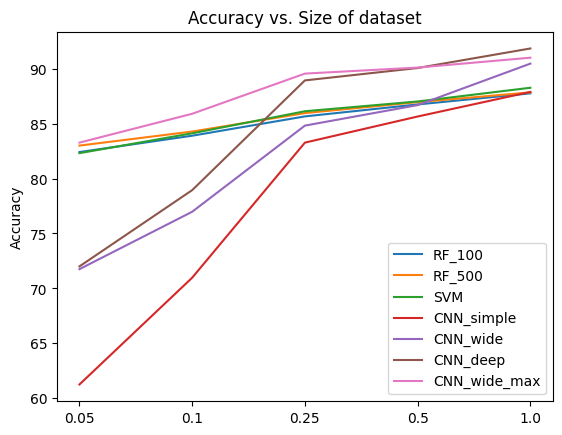

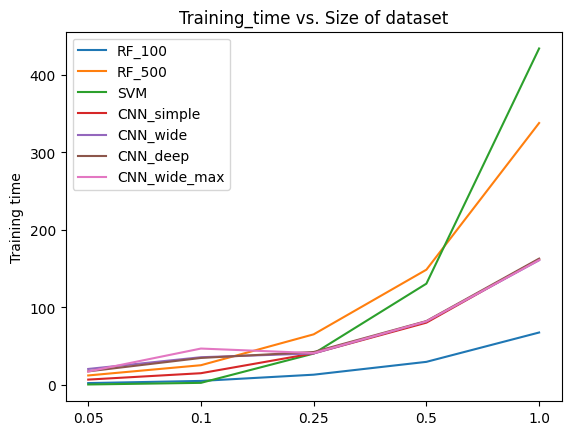

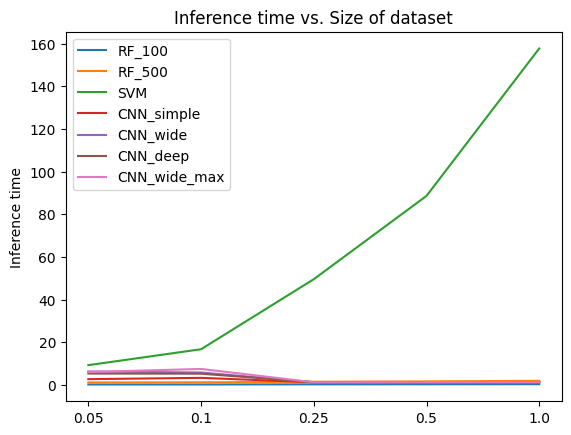

In [23]:
models=["RF_100","RF_500","SVM","CNN_simple","CNN_wide","CNN_deep","CNN_wide_max"]

values=list(range(5)) #because of the 'partitions' of the training set

fix,ax=plt.subplots(1,1)
for model in models:
    ax.plot(experiments[model]["accuracy"],label=model)
ax.set_xticks(values)
ax.set_xticklabels(experiments["percentages"])
ax.set_title("Accuracy vs. Size of dataset")
ax.set_ylabel("Accuracy")
ax.legend()

fix,ax=plt.subplots(1,1)
for model in models:
    ax.plot(experiments[model]["training_time"],label=model)
ax.set_xticks(values)
ax.set_xticklabels(experiments["percentages"])
ax.set_title("Training_time vs. Size of dataset")
ax.set_ylabel("Training time")
ax.legend()

fix,ax=plt.subplots(1,1)
for model in models:
    ax.plot(experiments[model]["inference_time"],label=model)
ax.set_xticks(values)
ax.set_xticklabels(experiments["percentages"])
ax.set_title("Inference time vs. Size of dataset")
ax.set_ylabel("Inference time")
ax.legend()

Which statements about the plots are correct?

a_) Inference time follows a similar pattern for all but one classifier.<br>
b_) Training time is almost identical for all classifiers.<br>
c_) CNN_simple has the lowest accuracy for all dataset sizes.<br>
d_) The worst accuracy for a model on any dataset is lower than $40%$. <br>
e_) The model with the shortest training time for a dataset fraction of $0.1$ is a random forest.  <br>
f_) All classifiers have an accuracy higher than $85%$ when being trained on the full dataset.

In [24]:
#your answers go here ↓↓↓
a_=True
b_=False
c_=False
d_=False
e_=False
f_=True

<h3 style="color:rgb(208,90,80)">2.2 Question (10 points)</h3>

Which statements are correct?

g_) Inference and training times indicate that SVMs are not feasible on large data sets.<br>
h_) A comparison of different algorithms is fair as long as they are compared on the same problem, i.e. the same training and test data.<br>
i_) A comparison of different algorithms should take into account the number of trainable model parameters or the training and inference times.<br>
j_) Monitoring the performance on the training data is pointless during training since only the performance on the test data counts.<br>
k_) On small data sets, the SVM and Random Forests achieve higher accuracy than the simple CNN.<br>
l_) Monitoring the performance on the training data and the test data is necessary to spot over-training.<br>

In [25]:
#your answers go here ↓↓↓
g_=True
h_=True
i_=True
j_=False
k_=True
l_=True

The take home messages of this task are:
- the model choice depends on the size and complexity of the data set
- the model choice is constrained by the available computing and time resources
- neural networks are often a good choice for large data sets, e.g. CNNs on computer vision tasks
- for smaller problems alternatives like SVM or Random Forests can be more efficient
- there is no algorithm that guarantees superior performance on every problem (aka "No free lunch theorem")